In [284]:
import matplotlib.pyplot as plt

# util.py

  Reads lines from a file, excluding blank lines and comments (lines starting with "#").

  Args:
      filename: The path to the file to read.

  Returns:
      A list of non-empty lines (excluding blank lines and comments).

In [285]:
def read_non_empty_lines(filename):
  
  data = []
  with open(filename, 'r') as file:
    for line in file:
      line = line.strip()  # Remove leading/trailing whitespace
      if line and not line.startswith('#'):  # Check if not empty and not a comment
        data.append(line)
  return data


In [286]:
filename = "config.txt"
non_empty_lines = read_non_empty_lines(filename)
print("This is non-empty lines from", filename)
for line in non_empty_lines:
  print(line)

This is non-empty lines from config.txt
A 1 2
B 2 5
C 2 11
D 3 6
E 5 13


  Splits a line into a list of tokens based on a specified delimiter.

  Args:
      line: The string to split.
      delimiter: The delimiter to use for splitting (default is space " ").

  Returns:
      A list of tokens from the line.

In [287]:
def split_line_into_tokens(line, delimiter=" "):
    
  return line.split(delimiter)

# Example usage

data=read_non_empty_lines(filename)
tokens = []
for i in range (len(data)) :
  line=data[i]
  tokens.append(split_line_into_tokens(line))

print("Tokens:", tokens)


Tokens: [['A', '1', '2'], ['B', '2', '5'], ['C', '2', '11'], ['D', '3', '6'], ['E', '5', '13']]


  Converts a list of tokens to appropriate data types for process information.

  Args:
      tokens: A list of tokens extracted from a line in the configuration file.

  Returns:
      A tuple containing process information (name, arrival_time, cpu_burst_time).

In [288]:

def convert_tokens_to_data(tokens):
  
  try:
    name = tokens[0]
    arrival_time = int(tokens[1])
    cpu_burst_time = int(tokens[2])
    return name, arrival_time, cpu_burst_time
  except (IndexError, ValueError):
    # Handle potential errors: missing tokens or invalid data types
    print(f"Error processing line: {''.join(tokens)}")
    return None, None, None  # Return dummy values on error


process_info_list =[]
for j in tokens :
  process_info_list.append(convert_tokens_to_data(j))

for i in process_info_list :
  if i :
    name, arrival_time, cpu_burst_time = i
    print("Process:", name, ", Arrival Time:", arrival_time, ", CPU Burst:", cpu_burst_time)


Process: A , Arrival Time: 1 , CPU Burst: 2
Process: B , Arrival Time: 2 , CPU Burst: 5
Process: C , Arrival Time: 2 , CPU Burst: 11
Process: D , Arrival Time: 3 , CPU Burst: 6
Process: E , Arrival Time: 5 , CPU Burst: 13


## Create process :

In [289]:
class Process:
    def __init__(self, name, arrival_time, cpu_burst):
        self.name = name
        self.arrival_time = arrival_time
        self.cpu_burst = cpu_burst
        self.waiting_time = 0
        self.turnaround_time = 0
        self.remaining_burst = cpu_burst

#### Creates a Process object from tokens and adds it to a list.
  ### Args:
      tokens: A list of tokens representing process information.

  ### Returns:
      A Process object (or None on error).

In [290]:

def create_process_and_add_to_list(tokens):
  
  process_info = convert_tokens_to_data(tokens)
  if process_info:
    name, arrival_time, cpu_burst_time = process_info
    process = Process(name, arrival_time, cpu_burst_time)
    return process
  else:
    return None


Reads process information from a file and creates a list of Process objects.

  ### Args:
      filename: The path to the configuration file
      
  ### Returns:
      A list of Process objects (or None on errors)

In [291]:
def read_processes_from_file(filename):
  
  processes = []
  non_empty_lines = read_non_empty_lines(filename)
  for line in non_empty_lines:
    tokens = split_line_into_tokens(line)
    process = create_process_and_add_to_list(tokens)
    if process:
      processes.append(process)
    else:
      print(f"Error processing line: {line}")
  return processes


filename = "config.txt"
processes = read_processes_from_file(filename)

if processes:
  print("List of Processes:")
  for process in processes:
    print(f"Process: {process.name}, Arrival Time: {process.arrival_time}, CPU Burst: {process.cpu_burst}")
else:
  print("Error reading processes from file!")

List of Processes:
Process: A, Arrival Time: 1, CPU Burst: 2
Process: B, Arrival Time: 2, CPU Burst: 5
Process: C, Arrival Time: 2, CPU Burst: 11
Process: D, Arrival Time: 3, CPU Burst: 6
Process: E, Arrival Time: 5, CPU Burst: 13


# fifo.py

In [292]:

def fifo_function(processes):
    current_time = 0
    for process in processes:
        if process.arrival_time > current_time:
            current_time = process.arrival_time

        process.waiting_time = current_time - process.arrival_time
        current_time += process.cpu_burst

        process.turnaround_time = current_time - process.arrival_time

    # Calculate average waiting time and turnaround time
    avg_waiting_time = sum(process.waiting_time for process in processes) / len(processes)
    avg_turnaround_time = sum(process.turnaround_time for process in processes) / len(processes)

    # Print results
    print("FIFO Scheduling Results:")
    print("Average Waiting Time:", avg_waiting_time)
    print("Average Turnaround Time:", avg_turnaround_time)
    print("Individual Process Statistics:")
    for process in processes:
        print(f"Process: {process.name}, Waiting Time: {process.waiting_time}, Turnaround Time: {process.turnaround_time}")




In [293]:
fifo_function(processes)

FIFO Scheduling Results:
Average Waiting Time: 8.6
Average Turnaround Time: 16.0
Individual Process Statistics:
Process: A, Waiting Time: 0, Turnaround Time: 2
Process: B, Waiting Time: 1, Turnaround Time: 6
Process: C, Waiting Time: 6, Turnaround Time: 17
Process: D, Waiting Time: 16, Turnaround Time: 22
Process: E, Waiting Time: 20, Turnaround Time: 33


# sjf.py

Simulates the Shortest Job First (SJF) scheduling algorithm.

    Args:
        processes: A list of Process objects.

    Prints the Gantt chart and calculates waiting time and turnaround time for each process.

In [294]:
def sjf_function(processes):
    
    processes.sort(key=lambda process: process.arrival_time)  # Sort by arrival time initially
    
    current_time = 0
    completed_processes = []
    remaining_processes = processes.copy()
    
    while remaining_processes:
        # Filter processes that have arrived by current time
        available_processes = [p for p in remaining_processes if p.arrival_time <= current_time]
        
        if not available_processes:
            # If no process has arrived, move time forward to the next arriving process
            current_time = remaining_processes[0].arrival_time
            available_processes = [p for p in remaining_processes if p.arrival_time <= current_time]
        
        # Select the process with the shortest CPU burst from the available processes
        next_process = min(available_processes, key=lambda process: process.cpu_burst)
        
        completed_time = current_time + next_process.cpu_burst
        next_process.waiting_time = current_time - next_process.arrival_time
        next_process.turnaround_time = next_process.waiting_time + next_process.cpu_burst

        completed_processes.append(next_process)
        remaining_processes.remove(next_process)
        current_time = completed_time

        print(f"[{current_time - next_process.cpu_burst}:{current_time}] Process {next_process.name}")

    # Calculate average waiting time and turnaround time
    avg_waiting_time = sum(process.waiting_time for process in completed_processes) / len(completed_processes)
    avg_turnaround_time = sum(process.turnaround_time for process in completed_processes) / len(completed_processes)

    print(f"Average Waiting Time: {avg_waiting_time:.2f}")
    print(f"Average Turnaround Time: {avg_turnaround_time:.2f}")



In [295]:
sjf_function(processes)

[1:3] Process A
[3:8] Process B
[8:14] Process D
[14:25] Process C
[25:38] Process E
Average Waiting Time: 7.60
Average Turnaround Time: 15.00


List of Processes:
Process: A, Arrival Time: 1, CPU Burst: 2
Process: B, Arrival Time: 2, CPU Burst: 5
Process: C, Arrival Time: 2, CPU Burst: 11
Process: D, Arrival Time: 3, CPU Burst: 6
Process: E, Arrival Time: 5, CPU Burst: 13
[1:3] Process A
[3:6] Process B
[6:9] Process C
[9:12] Process D
[12:14] Process B
[14:17] Process E
[17:20] Process C
[20:23] Process D
[23:26] Process E
[26:29] Process C
[29:32] Process E
[32:34] Process C
[34:37] Process E
[37:38] Process E
Average Waiting Time: 12.40
Average Turnaround Time: 19.80


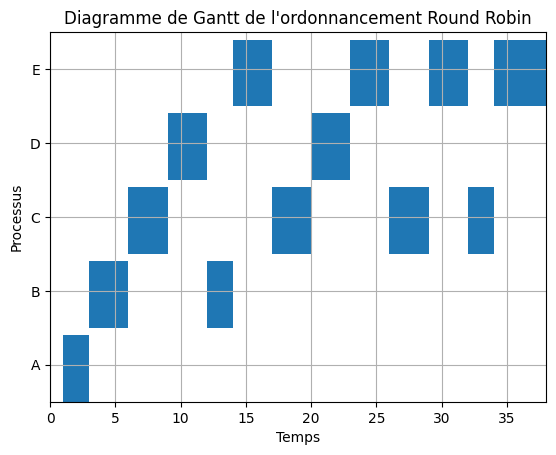

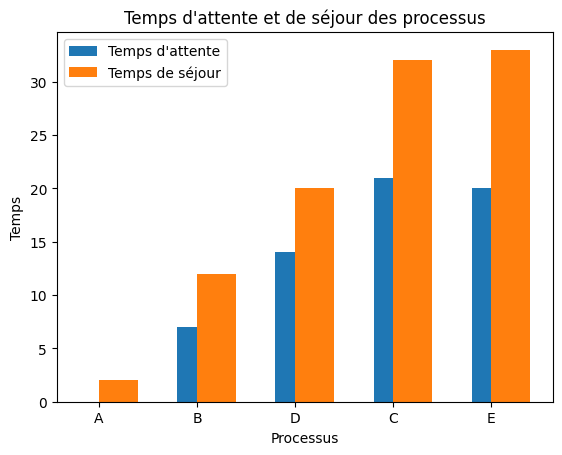

In [296]:

def rr_functionG(processes, time_quantum):
    ready_queue = []  # Queue for processes ready to be executed
    completed_processes = []
    current_time = 0
    gantt_chart = []

    while processes or ready_queue:
        # Add processes that have arrived at current time
        ready_queue.extend([p for p in processes if p.arrival_time <= current_time])
        processes = [p for p in processes if p.arrival_time > current_time]

        # Check if ready queue is empty
        if not ready_queue:
            current_time += 1
            continue

        # Get the first process from the queue
        process = ready_queue.pop(0)

        # Execute the process for the time quantum or remaining burst
        execution_time = min(time_quantum, process.remaining_burst)
        gantt_chart.append((process.name, current_time, current_time + execution_time))
        print(f"[{current_time}:{current_time + execution_time}] Process {process.name}")

        current_time += execution_time
        process.remaining_burst -= execution_time

        # Process completed
        if process.remaining_burst == 0:
            process.turnaround_time = current_time - process.arrival_time
            completed_processes.append(process)
        else:
            # Add back the process to the ready queue for further execution
            ready_queue.append(process)

    # Calculate average waiting time and turnaround time
    for process in completed_processes:
        process.waiting_time = process.turnaround_time - process.cpu_burst

    avg_waiting_time = sum(process.waiting_time for process in completed_processes) / len(completed_processes)
    avg_turnaround_time = sum(process.turnaround_time for process in completed_processes) / len(completed_processes)

    print(f"Average Waiting Time: {avg_waiting_time:.2f}")
    print(f"Average Turnaround Time: {avg_turnaround_time:.2f}")

    # Affichage graphique des résultats
    plot_gantt_chart(gantt_chart)
    plot_process_statistics(completed_processes)

def plot_gantt_chart(gantt_chart):
    fig, gnt = plt.subplots()

    # Set limits and labels for the plot
    gnt.set_ylim(0, 10 * len(set(name for name, _, _ in gantt_chart)))
    gnt.set_xlim(0, max(end for _, _, end in gantt_chart))
    gnt.set_xlabel('Temps')
    gnt.set_ylabel('Processus')

    # Extract unique process names and assign a position for each
    process_names = list(set(name for name, _, _ in gantt_chart))
    process_names.sort()
    process_positions = {name: (idx * 10 + 5) for idx, name in enumerate(process_names)}
    gnt.set_yticks(list(process_positions.values()))
    gnt.set_yticklabels(process_names)
    gnt.grid(True)

    # Plot each process in the Gantt chart
    for process_name, start_time, end_time in gantt_chart:
        gnt.broken_barh([(start_time, end_time - start_time)], (process_positions[process_name] - 5, 9), facecolors=('tab:blue'))
    
    plt.title('Diagramme de Gantt de l\'ordonnancement Round Robin')
    plt.show()

def plot_process_statistics(completed_processes):
    process_names = [process.name for process in completed_processes]
    waiting_times = [process.waiting_time for process in completed_processes]
    turnaround_times = [process.turnaround_time for process in completed_processes]

    x = range(len(completed_processes))

    fig, ax = plt.subplots()
    ax.bar(x, waiting_times, width=0.4, label='Temps d\'attente', align='center')
    ax.bar(x, turnaround_times, width=0.4, label='Temps de séjour', align='edge')

    ax.set_xlabel('Processus')
    ax.set_ylabel('Temps')
    ax.set_title('Temps d\'attente et de séjour des processus')
    ax.set_xticks(x)
    ax.set_xticklabels(process_names)
    ax.legend()

    plt.show()


print("List of Processes:")
for process in processes:
   print(f"Process: {process.name}, Arrival Time: {process.arrival_time}, CPU Burst: {process.cpu_burst}")

rr_functionG(processes, time_quantum=3)


# rr.py

Simulates the Round Robin (RR) scheduling algorithm.

    Args:
        processes: A list of Process objects.
        time_quantum: The time quantum for RR scheduling.

    Prints the Gantt chart and calculates waiting time and turnaround time for each process.

In [297]:
def rr_function(processes, time_quantum):
    """
    Simulates the Round Robin (RR) scheduling algorithm.

    Args:
        processes: A list of Process objects.
        time_quantum: The time quantum for RR scheduling.

    Prints the Gantt chart and calculates waiting time and turnaround time for each process.
    """
    ready_queue = []  # Queue for processes ready to be executed
    completed_processes = []
    current_time = 0

    while processes or ready_queue:
        # Add processes that have arrived at current time
        ready_queue.extend([p for p in processes if p.arrival_time <= current_time])
        processes = [p for p in processes if p.arrival_time > current_time]

        # Check if ready queue is empty
        if not ready_queue:
            current_time += 1
            continue

        # Get the first process from the queue
        process = ready_queue.pop(0)

        # Execute the process for the time quantum or remaining burst
        execution_time = min(time_quantum, process.remaining_burst)
        print(f"[{current_time}:{current_time + execution_time}] Process {process.name}")
        
        current_time += execution_time
        process.remaining_burst -= execution_time

        # Process completed
        if process.remaining_burst == 0:
            process.turnaround_time = current_time - process.arrival_time
            completed_processes.append(process)
        else:
            # Add back the process to the ready queue for further execution
            ready_queue.append(process)

    # Calculate average waiting time and turnaround time
    for process in completed_processes:
        process.waiting_time = process.turnaround_time - process.cpu_burst
    
    avg_waiting_time = sum(process.waiting_time for process in completed_processes) / len(completed_processes)
    avg_turnaround_time = sum(process.turnaround_time for process in completed_processes) / len(completed_processes)

    print(f"Average Waiting Time: {avg_waiting_time:.2f}")
    print(f"Average Turnaround Time: {avg_turnaround_time:.2f}")



In [298]:
rr_function(processes, time_quantum=2) 

[1:1] Process A
[2:2] Process B
[2:2] Process C
[3:3] Process D
[5:5] Process E
Average Waiting Time: -7.40
Average Turnaround Time: 0.00


List of Processes:
Process: A, Arrival Time: 1, CPU Burst: 2
Process: B, Arrival Time: 2, CPU Burst: 5
Process: C, Arrival Time: 2, CPU Burst: 11
Process: D, Arrival Time: 3, CPU Burst: 6
Process: E, Arrival Time: 5, CPU Burst: 13
FIFO Scheduling Results:
Average Waiting Time: 8.6
Average Turnaround Time: 16.0
Individual Process Statistics:
Process: A, Waiting Time: 0, Turnaround Time: 2
Process: B, Waiting Time: 1, Turnaround Time: 6
Process: C, Waiting Time: 6, Turnaround Time: 17
Process: D, Waiting Time: 16, Turnaround Time: 22
Process: E, Waiting Time: 20, Turnaround Time: 33


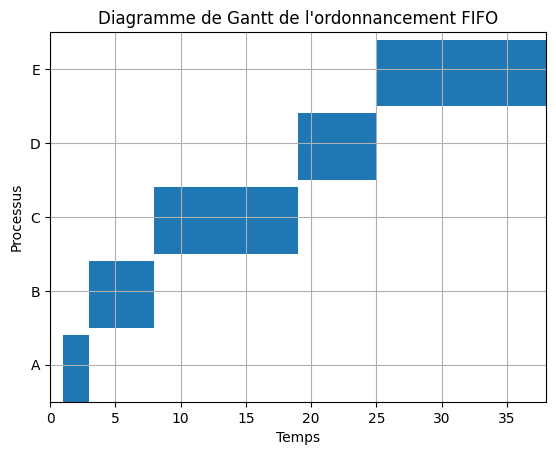

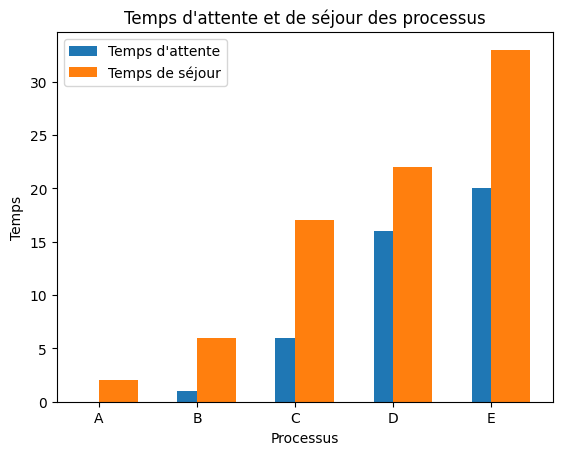

In [299]:
def fifo_functionG(processes):
    current_time = 0
    gantt_chart = []

    for process in processes:
        if process.arrival_time > current_time:
            current_time = process.arrival_time

        process.waiting_time = current_time - process.arrival_time
        gantt_chart.append((process.name, current_time, current_time + process.cpu_burst))
        current_time += process.cpu_burst
        process.turnaround_time = current_time - process.arrival_time

    # Calculate average waiting time and turnaround time
    avg_waiting_time = sum(process.waiting_time for process in processes) / len(processes)
    avg_turnaround_time = sum(process.turnaround_time for process in processes) / len(processes)

    # Print results
    print("FIFO Scheduling Results:")
    print("Average Waiting Time:", avg_waiting_time)
    print("Average Turnaround Time:", avg_turnaround_time)
    print("Individual Process Statistics:")
    for process in processes:
        print(f"Process: {process.name}, Waiting Time: {process.waiting_time}, Turnaround Time: {process.turnaround_time}")

    # Affichage graphique des résultats
    plot_gantt_chart(gantt_chart)
    plot_process_statistics(processes)

def plot_gantt_chart(gantt_chart):
    fig, gnt = plt.subplots()
    
    # Set limits and labels for the plot
    gnt.set_ylim(0, 10 * len(set(name for name, _, _ in gantt_chart)))
    gnt.set_xlim(0, max(end for _, _, end in gantt_chart))
    gnt.set_xlabel('Temps')
    gnt.set_ylabel('Processus')

    # Extract unique process names and assign a position for each
    process_names = list(set(name for name, _, _ in gantt_chart))
    process_names.sort()
    process_positions = {name: (idx * 10 + 5) for idx, name in enumerate(process_names)}
    gnt.set_yticks(list(process_positions.values()))
    gnt.set_yticklabels(process_names)
    gnt.grid(True)

    # Plot each process in the Gantt chart
    for process_name, start_time, end_time in gantt_chart:
        gnt.broken_barh([(start_time, end_time - start_time)], (process_positions[process_name] - 5, 9), facecolors=('tab:blue'))
    
    plt.title('Diagramme de Gantt de l\'ordonnancement FIFO')
    plt.show()

def plot_process_statistics(processes):
    process_names = [process.name for process in processes]
    waiting_times = [process.waiting_time for process in processes]
    turnaround_times = [process.turnaround_time for process in processes]

    x = range(len(processes))

    fig, ax = plt.subplots()
    ax.bar(x, waiting_times, width=0.4, label='Temps d\'attente', align='center')
    ax.bar(x, turnaround_times, width=0.4, label='Temps de séjour', align='edge')

    ax.set_xlabel('Processus')
    ax.set_ylabel('Temps')
    ax.set_title('Temps d\'attente et de séjour des processus')
    ax.set_xticks(x)
    ax.set_xticklabels(process_names)
    ax.legend()

    plt.show()



print("List of Processes:")
for process in processes:
    print(f"Process: {process.name}, Arrival Time: {process.arrival_time}, CPU Burst: {process.cpu_burst}")

fifo_functionG(processes)


[1:3] Process A
[3:8] Process B
[8:14] Process D
[14:25] Process C
[25:38] Process E
Average Waiting Time: 7.60
Average Turnaround Time: 15.00


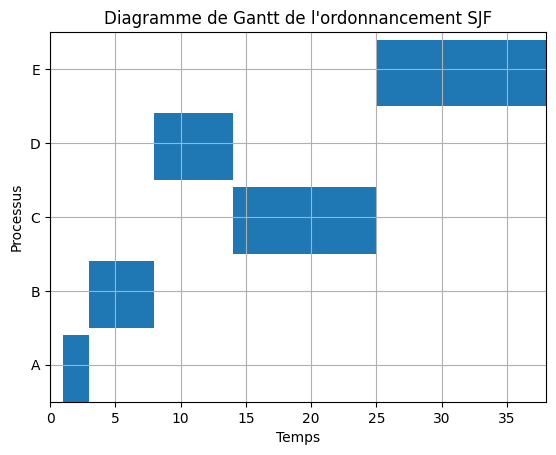

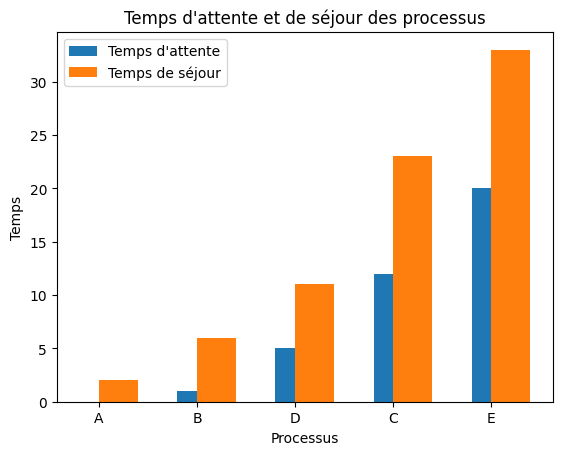

In [300]:
def sjf_functionG(processes):
    processes.sort(key=lambda process: process.arrival_time)  # Sort by arrival time initially
    
    current_time = 0
    completed_processes = []
    remaining_processes = processes.copy()
    gantt_chart = []

    while remaining_processes:
        # Filter processes that have arrived by current time
        available_processes = [p for p in remaining_processes if p.arrival_time <= current_time]
        
        if not available_processes:
            # If no process has arrived, move time forward to the next arriving process
            current_time = remaining_processes[0].arrival_time
            available_processes = [p for p in remaining_processes if p.arrival_time <= current_time]
        
        # Select the process with the shortest CPU burst from the available processes
        next_process = min(available_processes, key=lambda process: process.cpu_burst)
        
        completed_time = current_time + next_process.cpu_burst
        next_process.waiting_time = current_time - next_process.arrival_time
        next_process.turnaround_time = next_process.waiting_time + next_process.cpu_burst

        gantt_chart.append((next_process.name, current_time, completed_time))
        completed_processes.append(next_process)
        remaining_processes.remove(next_process)
        current_time = completed_time

        print(f"[{current_time - next_process.cpu_burst}:{current_time}] Process {next_process.name}")

    # Calculate average waiting time and turnaround time
    avg_waiting_time = sum(process.waiting_time for process in completed_processes) / len(completed_processes)
    avg_turnaround_time = sum(process.turnaround_time for process in completed_processes) / len(completed_processes)

    print(f"Average Waiting Time: {avg_waiting_time:.2f}")
    print(f"Average Turnaround Time: {avg_turnaround_time:.2f}")

    # Affichage graphique des résultats
    plot_gantt_chart(gantt_chart)
    plot_process_statistics(completed_processes)

def plot_gantt_chart(gantt_chart):
    fig, gnt = plt.subplots()
    
    # Set limits and labels for the plot
    gnt.set_ylim(0, 10 * len(set(name for name, _, _ in gantt_chart)))
    gnt.set_xlim(0, max(end for _, _, end in gantt_chart))
    gnt.set_xlabel('Temps')
    gnt.set_ylabel('Processus')

    # Extract unique process names and assign a position for each
    process_names = list(set(name for name, _, _ in gantt_chart))
    process_names.sort()
    process_positions = {name: (idx * 10 + 5) for idx, name in enumerate(process_names)}
    gnt.set_yticks(list(process_positions.values()))
    gnt.set_yticklabels(process_names)
    gnt.grid(True)

    # Plot each process in the Gantt chart
    for process_name, start_time, end_time in gantt_chart:
        gnt.broken_barh([(start_time, end_time - start_time)], (process_positions[process_name] - 5, 9), facecolors=('tab:blue'))
    
    plt.title('Diagramme de Gantt de l\'ordonnancement SJF')
    plt.show()

def plot_process_statistics(completed_processes):
    process_names = [process.name for process in completed_processes]
    waiting_times = [process.waiting_time for process in completed_processes]
    turnaround_times = [process.turnaround_time for process in completed_processes]

    x = range(len(completed_processes))

    fig, ax = plt.subplots()
    ax.bar(x, waiting_times, width=0.4, label='Temps d\'attente', align='center')
    ax.bar(x, turnaround_times, width=0.4, label='Temps de séjour', align='edge')

    ax.set_xlabel('Processus')
    ax.set_ylabel('Temps')
    ax.set_title('Temps d\'attente et de séjour des processus')
    ax.set_xticks(x)
    ax.set_xticklabels(process_names)
    ax.legend()

    plt.show()



sjf_functionG(processes)


[1:1] Process A
[2:2] Process B
[2:2] Process C
[3:3] Process D
[5:5] Process E
Average Waiting Time: -7.40
Average Turnaround Time: 0.00


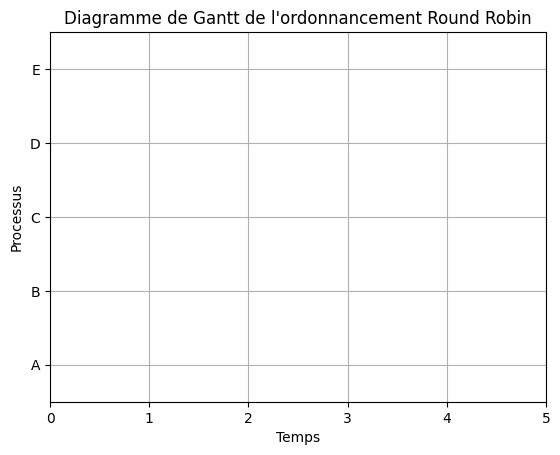

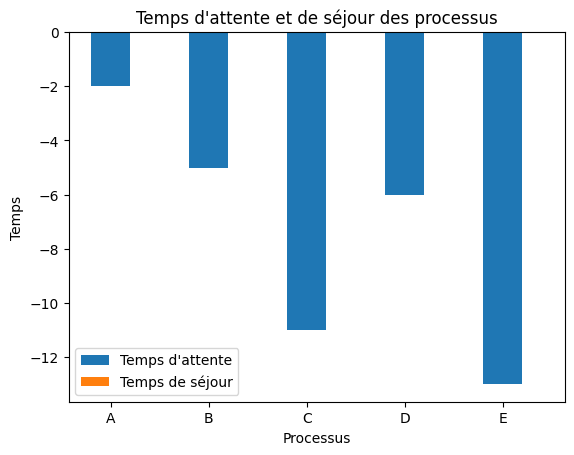

In [301]:

def rr_functionG(processes, time_quantum):
    ready_queue = []  # Queue for processes ready to be executed
    completed_processes = []
    current_time = 0
    gantt_chart = []

    while processes or ready_queue:
        # Add processes that have arrived at current time
        ready_queue.extend([p for p in processes if p.arrival_time <= current_time])
        processes = [p for p in processes if p.arrival_time > current_time]

        # Check if ready queue is empty
        if not ready_queue:
            current_time += 1
            continue

        # Get the first process from the queue
        process = ready_queue.pop(0)

        # Execute the process for the time quantum or remaining burst
        execution_time = min(time_quantum, process.remaining_burst)
        gantt_chart.append((process.name, current_time, current_time + execution_time))
        print(f"[{current_time}:{current_time + execution_time}] Process {process.name}")

        current_time += execution_time
        process.remaining_burst -= execution_time

        # Process completed
        if process.remaining_burst == 0:
            process.turnaround_time = current_time - process.arrival_time
            completed_processes.append(process)
        else:
            # Add back the process to the ready queue for further execution
            ready_queue.append(process)

    # Calculate average waiting time and turnaround time
    for process in completed_processes:
        process.waiting_time = process.turnaround_time - process.cpu_burst

    avg_waiting_time = sum(process.waiting_time for process in completed_processes) / len(completed_processes)
    avg_turnaround_time = sum(process.turnaround_time for process in completed_processes) / len(completed_processes)

    print(f"Average Waiting Time: {avg_waiting_time:.2f}")
    print(f"Average Turnaround Time: {avg_turnaround_time:.2f}")

    # Affichage graphique des résultats
    plot_gantt_chart(gantt_chart)
    plot_process_statistics(completed_processes)

def plot_gantt_chart(gantt_chart):
    fig, gnt = plt.subplots()

    # Set limits and labels for the plot
    gnt.set_ylim(0, 10 * len(set(name for name, _, _ in gantt_chart)))
    gnt.set_xlim(0, max(end for _, _, end in gantt_chart))
    gnt.set_xlabel('Temps')
    gnt.set_ylabel('Processus')

    # Extract unique process names and assign a position for each
    process_names = list(set(name for name, _, _ in gantt_chart))
    process_names.sort()
    process_positions = {name: (idx * 10 + 5) for idx, name in enumerate(process_names)}
    gnt.set_yticks(list(process_positions.values()))
    gnt.set_yticklabels(process_names)
    gnt.grid(True)

    # Plot each process in the Gantt chart
    for process_name, start_time, end_time in gantt_chart:
        gnt.broken_barh([(start_time, end_time - start_time)], (process_positions[process_name] - 5, 9), facecolors=('tab:blue'))
    
    plt.title('Diagramme de Gantt de l\'ordonnancement Round Robin')
    plt.show()

def plot_process_statistics(completed_processes):
    process_names = [process.name for process in completed_processes]
    waiting_times = [process.waiting_time for process in completed_processes]
    turnaround_times = [process.turnaround_time for process in completed_processes]

    x = range(len(completed_processes))

    fig, ax = plt.subplots()
    ax.bar(x, waiting_times, width=0.4, label='Temps d\'attente', align='center')
    ax.bar(x, turnaround_times, width=0.4, label='Temps de séjour', align='edge')

    ax.set_xlabel('Processus')
    ax.set_ylabel('Temps')
    ax.set_title('Temps d\'attente et de séjour des processus')
    ax.set_xticks(x)
    ax.set_xticklabels(process_names)
    ax.legend()

    plt.show()




rr_functionG(processes, time_quantum=4)


In [302]:
def rr_function(processes, time_quantum):
  
    ready_queue = []  # Queue for processes ready to be executed
    completed_processes = []
    current_time = 0

    while processes or ready_queue:
        # Add processes that have arrived at current time
        ready_queue.extend([p for p in processes if p.arrival_time <= current_time])
        processes = [p for p in processes if p.arrival_time > current_time]

        # Check if ready queue is empty
        if not ready_queue:
            current_time += 1
            continue

        # Get the first process from the queue
        process = ready_queue.pop(0)

        # Execute the process for the time quantum or remaining burst
        execution_time = min(time_quantum, process.remaining_burst)
        print(f"[{current_time}:{current_time + execution_time}] Process {process.name}")
        
        current_time += execution_time
        process.remaining_burst -= execution_time

        # Process completed
        if process.remaining_burst == 0:
            process.turnaround_time = current_time - process.arrival_time
            completed_processes.append(process)
        else:
            # Add back the process to the ready queue for further execution
            ready_queue.append(process)

    # Calculate average waiting time and turnaround time
    for process in completed_processes:
        process.waiting_time = process.turnaround_time - process.cpu_burst
    
    avg_waiting_time = sum(process.waiting_time for process in completed_processes) / len(completed_processes)
    avg_turnaround_time = sum(process.turnaround_time for process in completed_processes) / len(completed_processes)

    print(f"Average Waiting Time: {avg_waiting_time:.2f}")
    print(f"Average Turnaround Time: {avg_turnaround_time:.2f}")
